In [0]:
from torchtext import vocab
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [68]:
glove = vocab.GloVe(name = '6B', dim = 100)

print(f'There are {len(glove.itos)} words in the vocabulary')

There are 400000 words in the vocabulary


In [0]:
def tsne_plot(glove,n=200,n_components=2):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word , tensor_value in zip(glove.itos[:n],glove.vectors[:n]):
        tokens.append(tensor_value.numpy())
        labels.append(word)
        
    tsne_model = TSNE(perplexity=40, n_components=n_components, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    fig = plt.figure(figsize=(16, 16))
    if n_components==3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(new_values[:,0],new_values[:,1],new_values[:,2],c="r",marker="o")
        for i in range(len(new_values)):
            ax.text(new_values[i][0],new_values[i][1],new_values[i][2],labels[i])
    else:
        plt.scatter(new_values[:,0],new_values[:,1])
        for i in range(len(new_values)):
            plt.annotate(labels[i],
                        xy=(new_values[i][0],new_values[i][1]),
                        xytext=(5, 2),
                        textcoords='offset points',
                        ha='right',
                        va='bottom')
    return new_values,labels

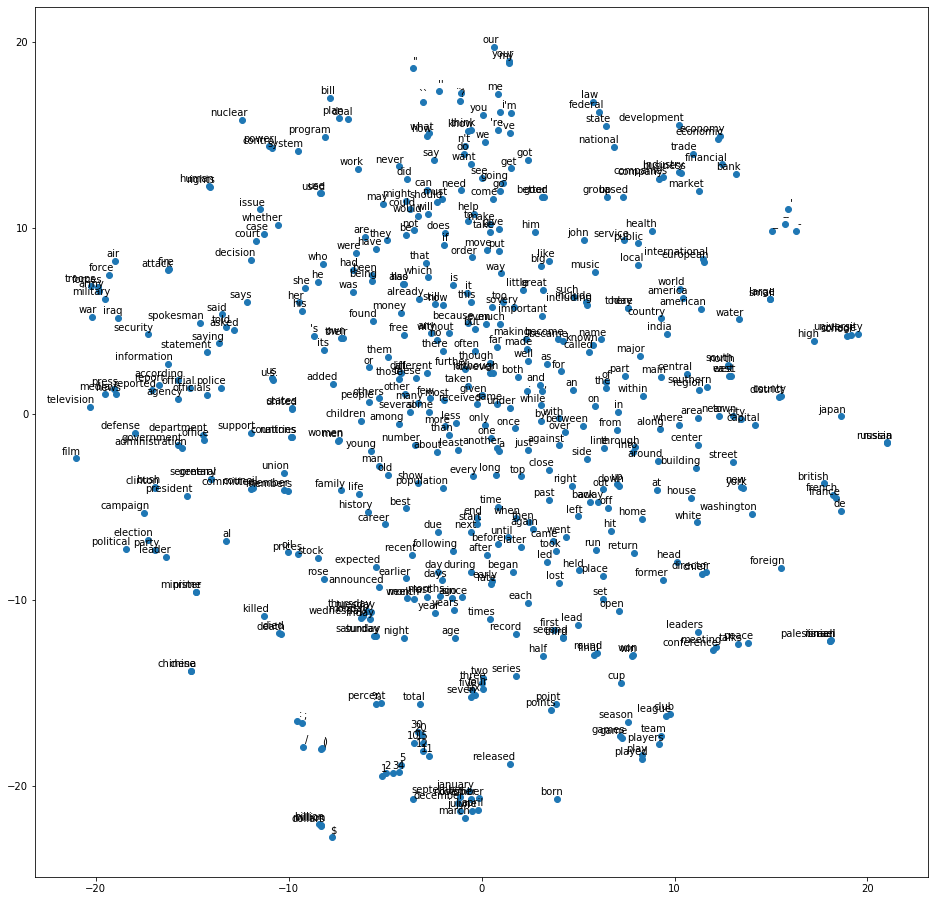

In [70]:
new_values,labels = tsne_plot(glove,n_components=2,n=500)